### VISUALIZA EL COMPORTAMIENTO DE EL ARCHIVOS CSV SELECCIONADO

Grafica el comportamiento de una columna o mas

-ejecutar el codigo

-en la parte inferior del codigo, se muestran las columnas disponibles a graficar

-se abrira un apartado para que pueda escribir la o las columnas que desee graficar, tendra que separar con comas cada columna diferente

-presione enter para graficar


Columnas disponibles para graficar:
0: UTEM CIER DAVID-Mains_A (kWatts)
1: UTEM CIER DAVID-Mains_B (kWatts)
2: UTEM CIER DAVID-Mains_C (kWatts)
3: UTEM CIER DAVID-Air Conditioner-AC fotovoltaica 1 (kWatts)
4: UTEM CIER DAVID-Air Conditioner-AC fotovoltaica 2 (kWatts)
5: UTEM CIER DAVID-Air Conditioner-AC Aula Magna  (kWatts)
6: UTEM CIER DAVID-Air Conditioner-AC Aula Magna (kWatts)
7: UTEM CIER DAVID-Sub Panel-Tab Secundario L1 (kWatts)
8: UTEM CIER DAVID-Sub Panel-Tab Secundario L2 (kWatts)
9: UTEM CIER DAVID-Sub Panel-Tab Secundario L3 (kWatts)
10: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L1 (kWatts)
11: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L2 (kWatts)
12: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L3 (kWatts)
13: UTEM CIER DAVID-Solar/Generation-Inversor (kWatts)
14: UTEM CIER DAVID-Room/Multi-use Circuit-Contactos David (kWatts)
15: UTEM CIER DAVID-Lights-Alumbrado (kWatts)
16: UTEM CIER DAVID-Lights-Alumbrado Fotovoltaico (kWatts)
17: UTEM CIER DAVID-Other-Circui

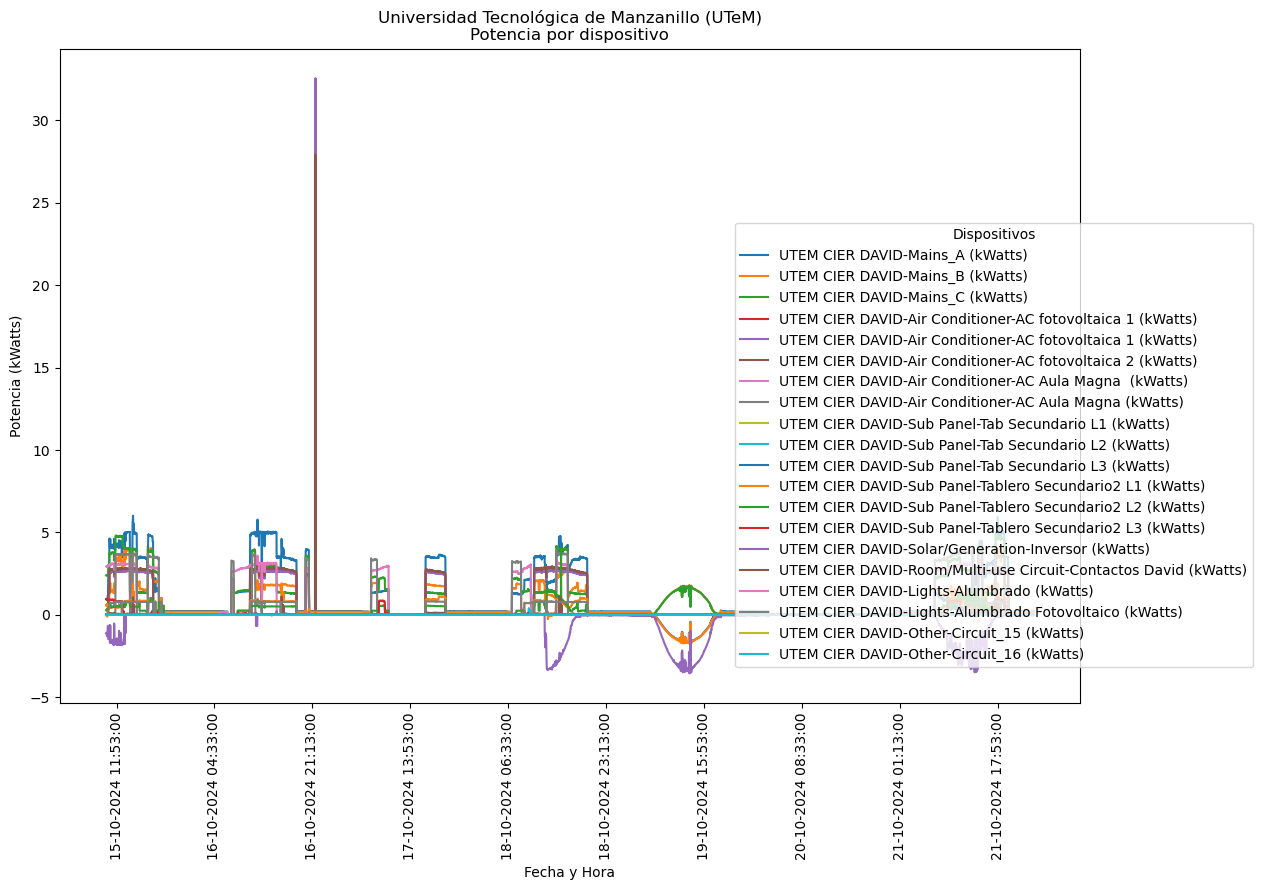

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer el archivo CSV
archivo_csv = "1min.csv"
df = pd.read_csv(archivo_csv)

# Convertir la columna de tiempo en un formato de fecha adecuado
df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], format='%m/%d/%Y %H:%M:%S', errors='raise')

# Eliminar el prefijo 'UTeM CIER Sala Mestros-' de los nombres de las columnas
df.columns = df.columns.str.replace('UTeM CIER Sala Mestros-', '')

# Pedir al usuario que seleccione las columnas que desea graficar
columnas_disponibles = df.columns[1:]  # Excluir la columna de tiempo
print("\nColumnas disponibles para graficar:")
for i, col in enumerate(columnas_disponibles):
    print(f"{i}: {col}")  # Mostrar el índice y el nombre de la columna

# Solicitar la entrada del usuario para seleccionar las columnas
columnas_indices = input("\nIntroduce los índices de las columnas que deseas graficar, separados por comas (ejemplo: 0,1,2): ")
columnas_seleccionadas = [columnas_disponibles[int(i)] for i in columnas_indices.split(',')]

# Calcular el total de cada columna seleccionada y el total general
totales_columnas = df[columnas_seleccionadas].sum()
total_general = totales_columnas.sum()

# Graficar las columnas seleccionadas
fig, ax = plt.subplots(figsize=(11, 9))

# Gráfica de las columnas seleccionadas
for columna in columnas_seleccionadas:
    ax.plot(df['Time Bucket (America/Costa_Rica)'], df[columna], label=columna)

# Añadir título y etiquetas
ax.set_title('Universidad Tecnológica de Manzanillo (UTeM)\nPotencia por dispositivo')
ax.set_xlabel('Fecha y Hora')
ax.set_ylabel('Potencia (kWatts)')

# Formato de las etiquetas del eje X
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M:%S'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1000))

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Crear una leyenda en un área separada fuera de la gráfica
fig.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), title="Dispositivos")

# Mostrar la gráfica
plt.show()



Resultados guardados en resultados_estadisticas.xlsx


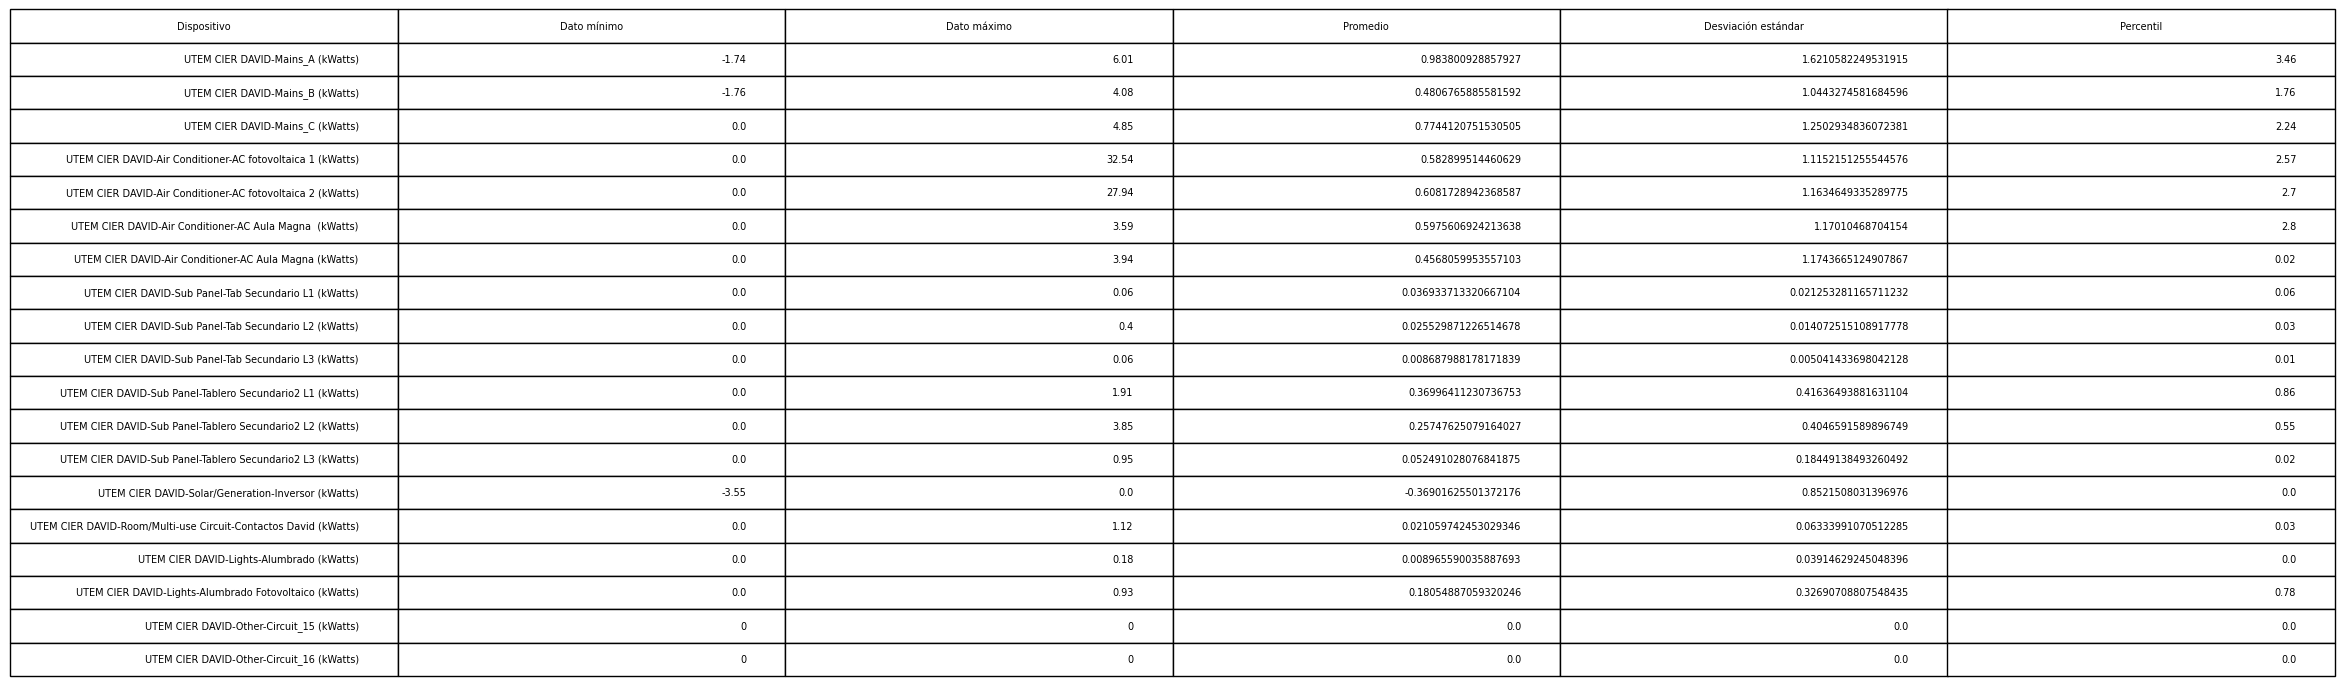

In [11]:
import numpy as np
columnas = []

# Calcular estadísticas para cada columna seleccionada
for i in columnas_seleccionadas:
    fila = [
        i,
        df[i].min(),
        df[i].max(),
        df[i].mean(),
        np.std(df[i]),
        df[i].quantile(0.85)
    ]
    columnas.append(fila)

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(columnas, columns=['Dispositivo', 'Dato mínimo', 'Dato máximo', 'Promedio', 'Desviación estándar', 'Percentil'])

# Exportar el DataFrame a un archivo Excel
nombre_archivo = 'resultados_estadisticas.xlsx'
resultados_df.to_excel(nombre_archivo, index=False)

print(f"Resultados guardados en {nombre_archivo}")

# FIGURA DE LA TABLA
plt.figure(figsize=(15, 5))

# Crear la tabla
tabla = plt.table(cellText=columnas, colLabels=['Dispositivo', 'Dato mínimo', 'Dato máximo', 'Promedio', 'Desviación estándar', 'Percentil'], loc='center')

# AJUSTE DE TAMAÑO 
tabla.auto_set_font_size(False)
tabla.set_fontsize(7)
tabla.scale(2, 2)

# OCULTAR EJES (X,Y)
plt.axis('off')

# MOSTRAR LA TABLA
plt.show()


In [12]:
print(df['Time Bucket (America/Costa_Rica)'].dtypes)


datetime64[ns]


Resultados guardados en resultados_actividad.xlsx


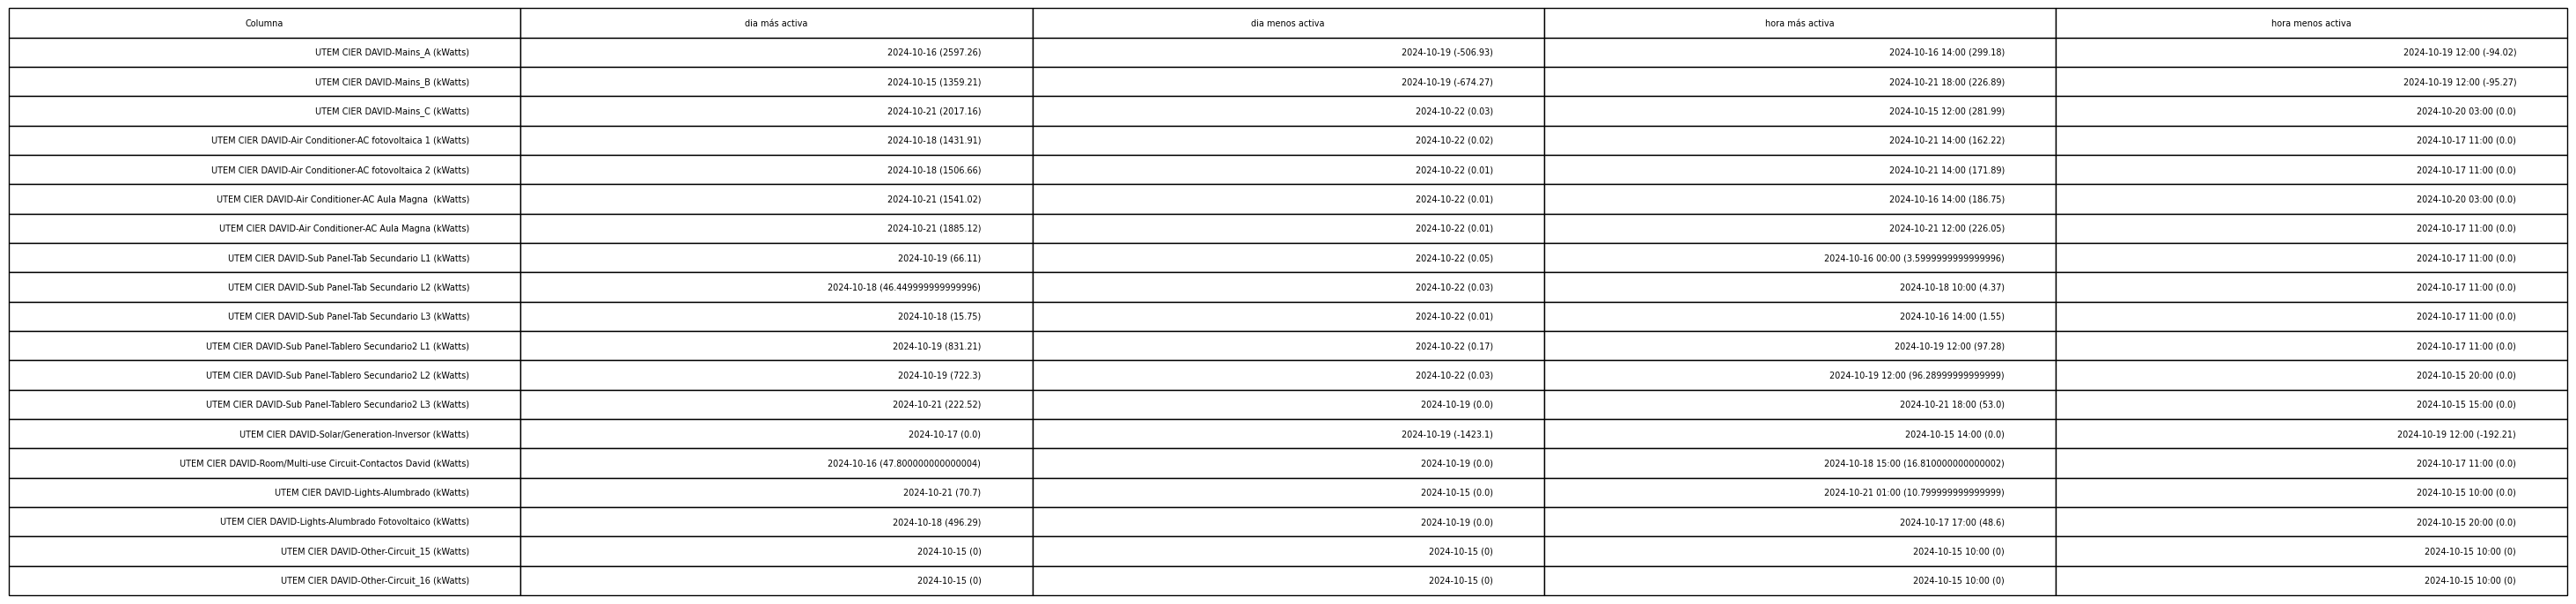

In [13]:
columnas = []

# Iterar sobre las columnas seleccionadas
for columna in columnas_seleccionadas:
    # Agrupar por semana y calcular la suma de la columna actual
    df['dia'] = df['Time Bucket (America/Costa_Rica)'].dt.to_period('D')
    actividad_diaria = df.groupby('dia')[columna].sum()

    # Encontrar la semana con la actividad más alta y más baja
    dia_valor_maximo = actividad_diaria.idxmax()
    dia_valor_minimo = actividad_diaria.idxmin()

    # Agrupar por mes y calcular la suma de la columna actual
    df['hora'] = df['Time Bucket (America/Costa_Rica)'].dt.to_period('h')
    actividad_por_hora = df.groupby('hora')[columna].sum()

    # Encontrar el mes con la actividad más alta y más baja
    hora_valor_maximo = actividad_por_hora.idxmax()
    hora_valor_minimo = actividad_por_hora.idxmin()

    # Agregar los resultados a la tabla
    fila = [
        columna,
        f"{dia_valor_maximo} ({actividad_diaria.max()})",
        f"{dia_valor_minimo} ({actividad_diaria.min()})",
        f"{hora_valor_maximo} ({actividad_por_hora.max()})",
        f"{hora_valor_minimo} ({actividad_por_hora.min()})"
    ]
    columnas.append(fila)

# Crear un DataFrame con los resultados
resultados_df = pd.DataFrame(columnas, columns=['Columna', 'dia más activa', 'dia menos activa', 'hora más activa', 'hora menos activa'])

# Exportar el DataFrame a un archivo Excel
nombre_archivo = 'resultados_actividad.xlsx'
resultados_df.to_excel(nombre_archivo, index=False)

print(f"Resultados guardados en {nombre_archivo}")

# Crear la tabla para mostrar en gráfico (opcional)
plt.figure(figsize=(15, 5))
tabla = plt.table(cellText=columnas, colLabels=['Columna', 'dia más activa', 'dia menos activa', 'hora más activa', 'hora menos activa'], loc='center')

# Ajuste de tamaño
tabla.auto_set_font_size(False)
tabla.set_fontsize(7)
tabla.scale(2.5, 2)

# Ocultar ejes (X, Y)
plt.axis('off')

# Mostrar la tabla
plt.show()


Grafica la potencia total de las columnas seleccionadas

-ejecutar el codigo

-en la parte inferior del codigo, se muestran las columnas disponibles a graficar

-se abrira un apartado para que pueda escribir la o las columnas que desee graficar, tendra que separar con comas cada columna diferente

-presione enter para graficar

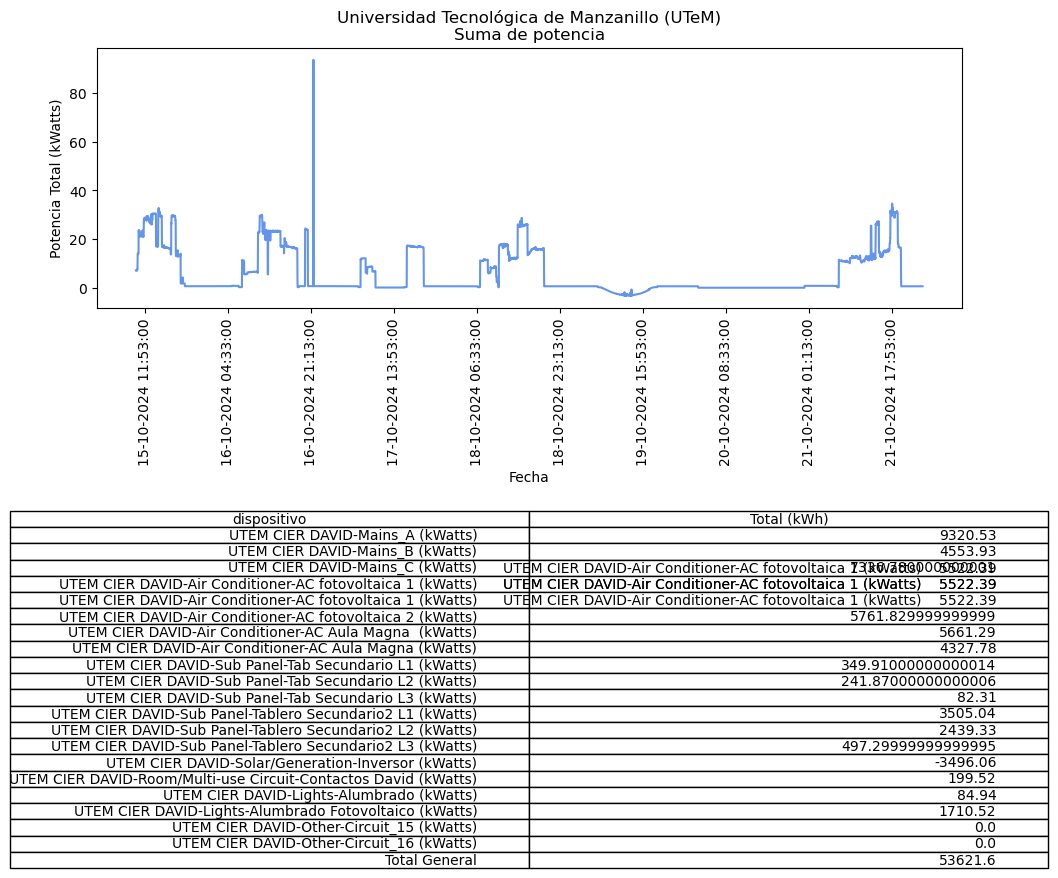

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer el archivo CSV
#archivo_csv = "EF63E8-UTeM_CIER_Sala_Mestros-1MIN Fig 6 desglose.csv"
#df = pd.read_csv(archivo_csv)

# Convertir la columna de tiempo en un formato de fecha adecuado, manejando formatos mixtos
df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], errors='coerce')

# Eliminar el prefijo 'UTeM CIER Sala Mestros-' de los nombres de las columnas
df.columns = df.columns.str.replace('UTeM CIER Sala Mestros-', '')

# Crear una nueva columna que sume los valores seleccionados
df['suma_total'] = df[columnas_seleccionadas].sum(axis=1)

# Calcular el total de cada columna seleccionada y el total general
totales_columnas = df[columnas_seleccionadas].sum()
total_general = totales_columnas.sum()

# Graficar la suma de las columnas seleccionadas
plt.figure(figsize=(11, 9))

# Graficar la suma total en la parte superior
plt.subplot(2, 1, 1)  # Dividir la figura en 2 filas, 1 columna, seleccionar el primer subplot
plt.plot(df['Time Bucket (America/Costa_Rica)'], df['suma_total'], label='Suma Total', color='cornflowerblue')

# Añadir título y etiquetas
plt.title("Universidad Tecnológica de Manzanillo (UTeM)\nSuma de potencia")
plt.xlabel('Fecha')
plt.ylabel('Potencia Total (kWatts)')

# Formato de las etiquetas del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y %H:%M:%S'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1000)) 

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Crear una tabla debajo de la gráfica con las columnas seleccionadas y sus totales
plt.subplot(2, 1, 2)  # Seleccionar el segundo subplot para la tabla
columnas_tabla = [[col, totales_columnas[col]] for col in columnas_seleccionadas]  # Crear filas con el nombre y el total
columnas_tabla.append(['Total General', total_general])  # Añadir la fila para el total general

tabla = plt.table(cellText=columnas_tabla, colLabels=['dispositivo', 'Total (kWh)'], loc='center')

# Ajustar el tamaño de las celdas
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)

# Ocultar los ejes para la tabla
plt.gca().axis('off')

# Ajustar el layout para evitar que la tabla se corte
plt.tight_layout()

# Mostrar la gráfica y la tabla
plt.show()

In [4]:
print(df['Time Bucket (America/Costa_Rica)'].min())
print(df['Time Bucket (America/Costa_Rica)'].max())

2024-10-15 10:07:00
2024-10-22 00:00:00


Grafica la potencia de una columna o mas en un rango de tiempo 

-ejecutar el codigo

-en la parte inferior del codigo, se muestra el rango de tiempo disponible para graficar

-se abrira un apartado para que pueda escribir el rango deseado

-presionar enter para continuar

-en la parte inferior del codigo, se muestran las columnas disponibles a graficar

-se abrira un apartado para que pueda escribir la o las columnas que desee graficar, tendra que separar con comas cada columna diferente

-presione enter para graficar


Rango de tiempo disponible para graficar: desde 2024-10-15 10:07:00 hasta 2024-10-22 00:00:00


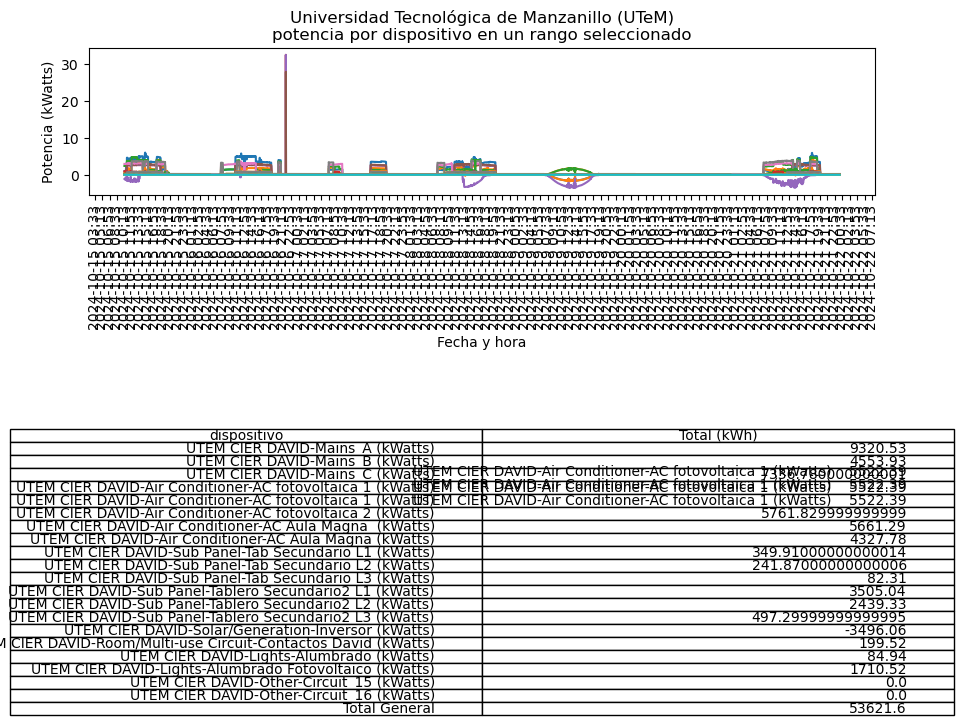

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer el archivo CSV
#archivo_csv = "EF63E8-UTeM_CIER_Sala_Mestros-1MIN Fig 6 desglose.csv"
#df = pd.read_csv(archivo_csv)

# Convertir la columna de tiempo en un formato de fecha adecuado, manejando formatos mixtos
df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], errors='coerce')

# Eliminar el prefijo 'UTeM CIER Sala Mestros-' de los nombres de las columnas
df.columns = df.columns.str.replace('UTeM CIER Sala Mestros-', '')

# Mostrar el rango de tiempo disponible
fecha_min = df['Time Bucket (America/Costa_Rica)'].min()
fecha_max = df['Time Bucket (America/Costa_Rica)'].max()
print(f"\nRango de tiempo disponible para graficar: desde {fecha_min} hasta {fecha_max}")

# Solicitar al usuario el rango de tiempo
fecha_inicio = pd.to_datetime(input(f"\nIntroduce la fecha de inicio (formato: YYYY-MM-DD HH:MM:SS) dentro del rango disponible: "))
fecha_fin = pd.to_datetime(input(f"Introduce la fecha de fin (formato: YYYY-MM-DD HH:MM:SS) dentro del rango disponible: "))

# Filtrar los datos por el rango de fechas
df_filtrado = df[(df['Time Bucket (America/Costa_Rica)'] >= fecha_inicio) & (df['Time Bucket (America/Costa_Rica)'] <= fecha_fin)]


# Calcular el total de cada columna seleccionada y el total general
totales_columnas = df_filtrado[columnas_seleccionadas].sum()
total_general = totales_columnas.sum()

# Graficar las columnas seleccionadas
plt.figure(figsize=(10, 8))

# Gráfica de las columnas seleccionadas
plt.subplot(2, 1, 1)  # Dividir la figura en 2 filas, 1 columna, seleccionar el primer subplot
for columna in columnas_seleccionadas:
    plt.plot(df_filtrado['Time Bucket (America/Costa_Rica)'], df_filtrado[columna], label=columna)

# Añadir título y etiquetas
plt.title("Universidad Tecnológica de Manzanillo (UTeM)\npotencia por dispositivo en un rango seleccionado")
plt.xlabel('Fecha y hora')
plt.ylabel('Potencia (kWatts)')

# Formato de las etiquetas del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=100)) 

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Crear una tabla debajo de la gráfica con las columnas seleccionadas y sus totales
plt.subplot(2, 1, 2)  # Seleccionar el segundo subplot para la tabla
columnas_tabla = [[col, totales_columnas[col]] for col in columnas_seleccionadas]  # Crear filas con el nombre y el total
columnas_tabla.append(['Total General', total_general])  # Añadir la fila para el total general

tabla = plt.table(cellText=columnas_tabla, colLabels=['dispositivo', 'Total (kWh)'], loc='center')

# Ajustar el tamaño de las celdas
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.5)

# Ocultar los ejes para la tabla
plt.gca().axis('off')

# Ajustar el layout para evitar que la tabla se corte
plt.tight_layout()

# Mostrar la gráfica y la tabla
plt.show()



C:\Users\cesar chavez\AppData\Local\Temp\ipykernel_12656\558428068.py:48: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


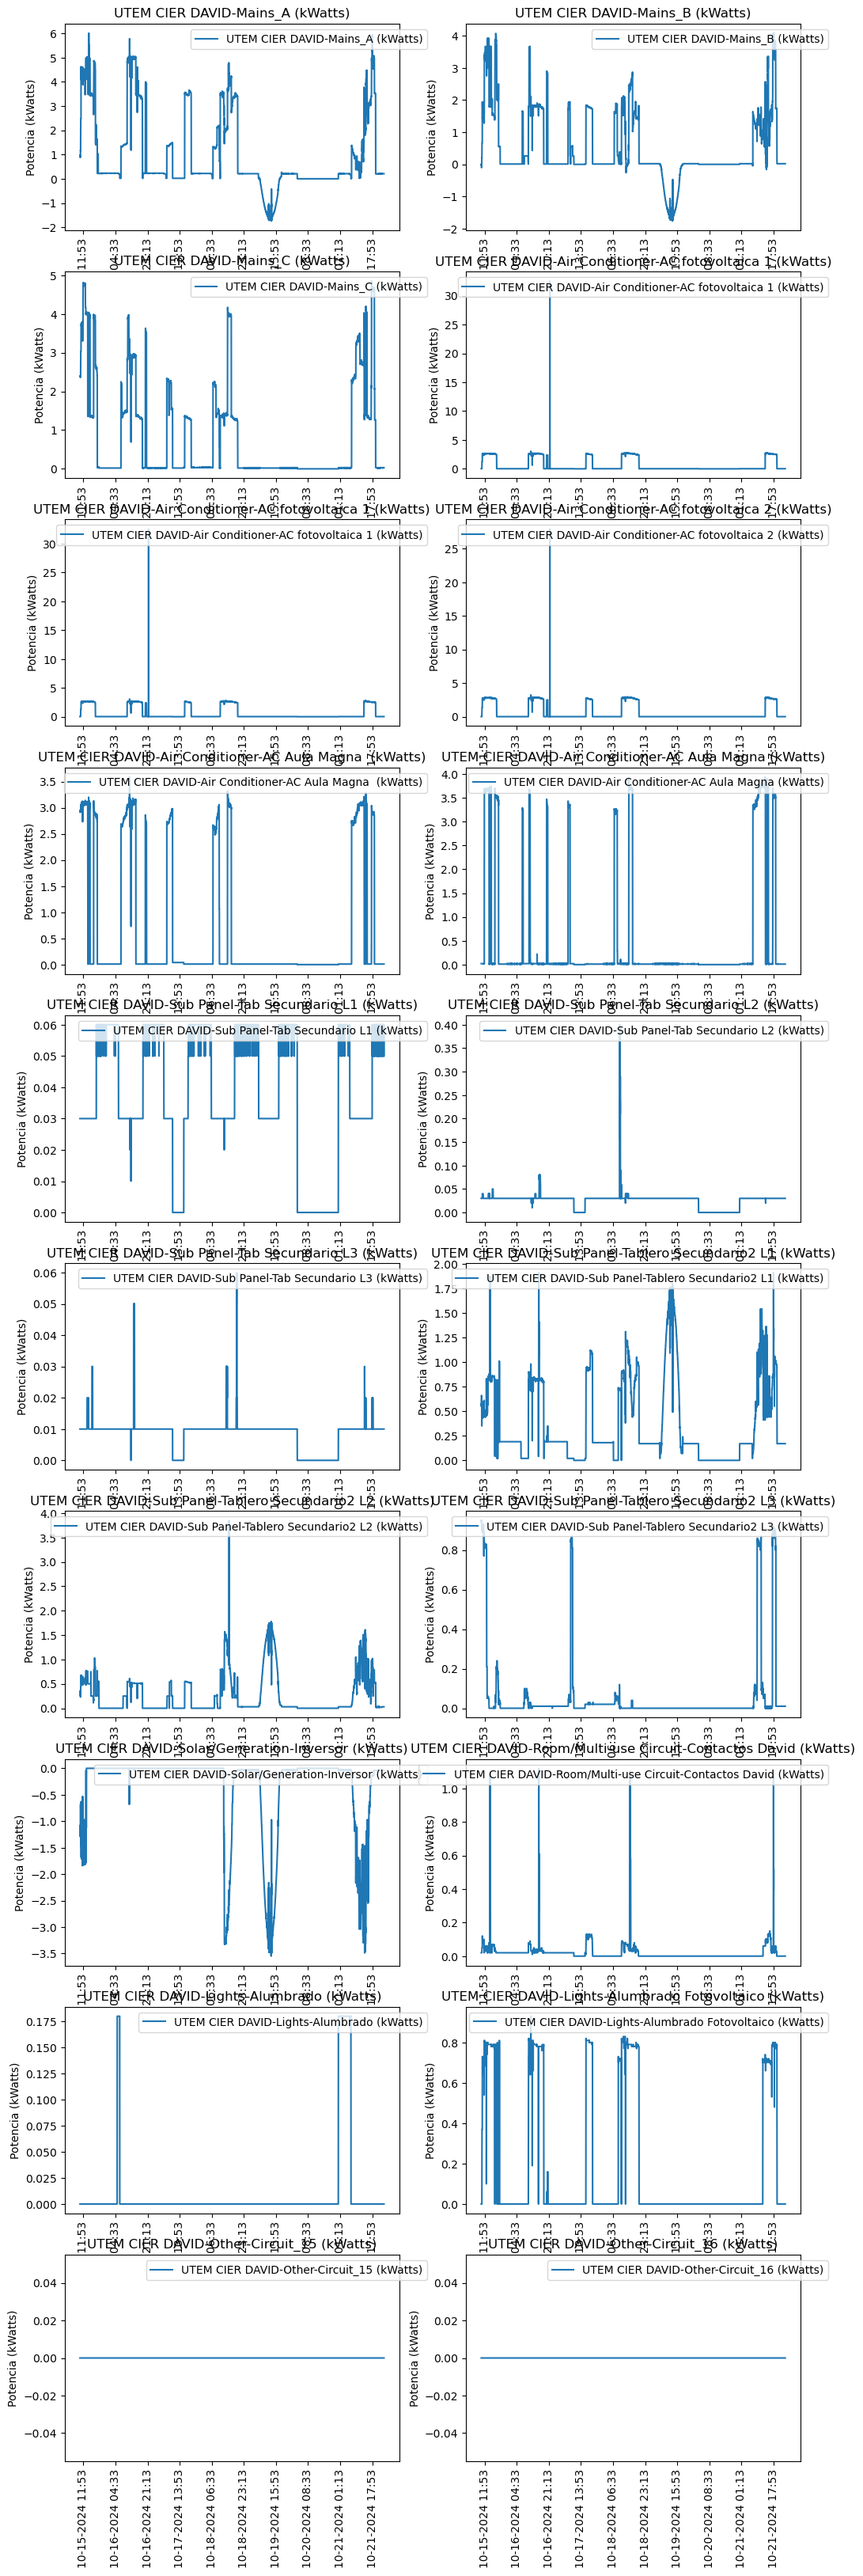

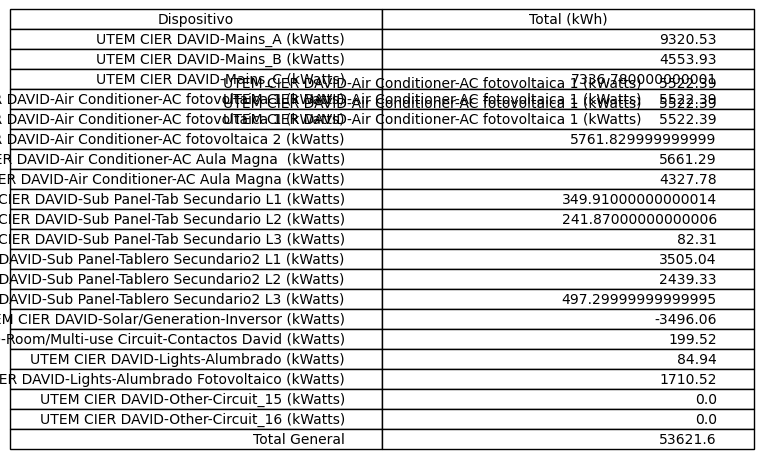

In [20]:

# Filtrar los datos por el rango de fechas
df_filtrado = df[(df['Time Bucket (America/Costa_Rica)'] >= fecha_inicio) & (df['Time Bucket (America/Costa_Rica)'] <= fecha_fin)]

# Calcular el total de cada columna seleccionada y el total general
totales_columnas = df_filtrado[columnas_seleccionadas].sum()
total_general = totales_columnas.sum()

# Graficar cada columna seleccionada en un formato de cuadrícula (2xN)
num_columnas = len(columnas_seleccionadas)
num_filas = (num_columnas + 1) // 2  # Calcular el número de filas necesarias

plt.figure(figsize=(12, 4 * num_filas))  # Ajustar el tamaño de la figura según el número de filas

for i, columna in enumerate(columnas_seleccionadas):
    plt.subplot(num_filas, 2, i + 1)  # Dividir la figura en varias filas y 2 columnas
    plt.plot(df_filtrado['Time Bucket (America/Costa_Rica)'], df_filtrado[columna], label=columna)

    # Añadir título y etiquetas
    plt.title(f"{columna}")
    plt.ylabel('Potencia (kWatts)')

    # Formato de las etiquetas del eje X
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m-%d-%Y %H:%M'))
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1000))

    # Mover la leyenda a la parte superior derecha fuera de la gráfica para que no obstruya
    plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

    # Rotar las etiquetas del eje X para mayor legibilidad
    plt.xticks(rotation=90)

# Crear una tabla general debajo de las gráficas con las columnas seleccionadas y sus totales
plt.figure(figsize=(8, 2))  # Tamaño de la figura para la tabla
columnas_tabla = [[col, totales_columnas[col]] for col in columnas_seleccionadas]  # Crear filas con el nombre y el total
columnas_tabla.append(['Total General', total_general])  # Añadir la fila para el total general

tabla = plt.table(cellText=columnas_tabla, colLabels=['Dispositivo', 'Total (kWh)'], loc='center')

# Ajustar el tamaño de las celdas
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)

# Ocultar los ejes para la tabla
plt.gca().axis('off')

# Ajustar el layout para evitar que la tabla se corte
plt.tight_layout()

# Mostrar las gráficas y la tabla
plt.show()


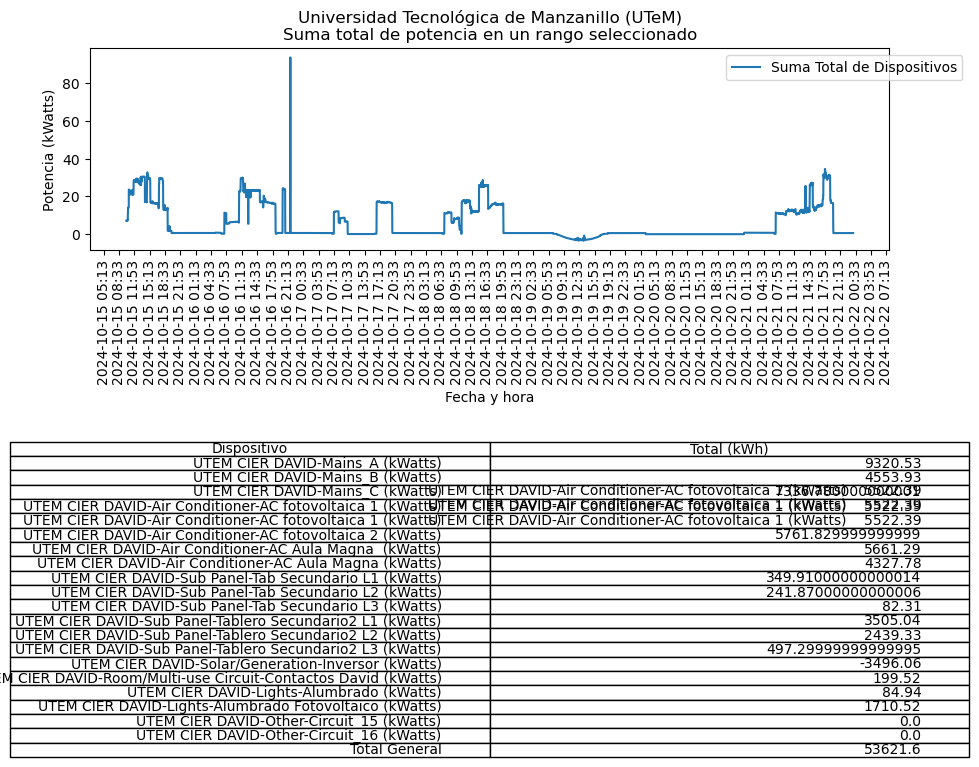

In [21]:


# Calcular la suma acumulada de las columnas seleccionadas por cada intervalo de tiempo
df_filtrado['Suma Total'] = df_filtrado[columnas_seleccionadas].sum(axis=1)

# Calcular el total de cada columna seleccionada y el total general
totales_columnas = df_filtrado[columnas_seleccionadas].sum()
total_general = totales_columnas.sum()

# Crear la figura y los subplots para la gráfica y la tabla
plt.figure(figsize=(10, 8))

# Gráfica de la suma acumulada
plt.subplot(2, 1, 1)  # Dividir la figura en 2 filas, 1 columna, seleccionar el primer subplot
plt.plot(df_filtrado['Time Bucket (America/Costa_Rica)'], df_filtrado['Suma Total'], label='Suma Total de Dispositivos')

# Añadir título y etiquetas
plt.title("Universidad Tecnológica de Manzanillo (UTeM)\nSuma total de potencia en un rango seleccionado")
plt.xlabel('Fecha y hora')
plt.ylabel('Potencia (kWatts)')

# Formato de las etiquetas del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=200))

# Mover la leyenda a la parte superior derecha fuera de la gráfica para que no obstruya
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Crear una tabla debajo de la gráfica con las columnas seleccionadas y sus totales
plt.subplot(2, 1, 2)  # Seleccionar el segundo subplot para la tabla
columnas_tabla = [[col, totales_columnas[col]] for col in columnas_seleccionadas]  # Crear filas con el nombre y el total
columnas_tabla.append(['Total General', total_general])  # Añadir la fila para el total general

tabla = plt.table(cellText=columnas_tabla, colLabels=['Dispositivo', 'Total (kWh)'], loc='center')

# Ajustar el tamaño de las celdas
tabla.auto_set_font_size(False)
tabla.set_fontsize(10)
tabla.scale(1.2, 1.2)

# Ocultar los ejes para la tabla
plt.gca().axis('off')

# Ajustar el layout para evitar que la tabla se corte
plt.tight_layout()

# Mostrar la gráfica y la tabla
plt.show()


In [24]:
# Pedir al usuario que seleccione las columnas que desea graficar
columnas_disponibles = df_filtrado.columns[1:]  # Excluir la columna de tiempo
print("\nColumnas disponibles para graficar:")
for i, col in enumerate(columnas_disponibles):
    print(f"{i}: {col}")  # Mostrar el índice y el nombre de la columna

    # Asegurarse de que la columna de tiempo esté en el formato datetime
df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], errors='coerce')

# Eliminar filas con fechas inválidas que podrían generar problemas en la gráfica
df = df.dropna(subset=['Time Bucket (America/Costa_Rica)'])

# Solicitar al usuario que ingrese los índices de las columnas a seleccionar para la resta
columnas_indices_1 = input("\nIntroduce los índices de las columnas que deseas restar, separados por comas (ejemplo: 0,1): ")
columnas_seleccionadas_1 = [df.columns[int(i)] for i in columnas_indices_1.split(',')]

# Solicitar al usuario que ingrese los índices de las columnas que restará
columnas_indices_2 = input("\nIntroduce los índices de las columnas que deseas restar de las anteriores, separados por comas (ejemplo: 0,1,2): ")
columnas_seleccionadas_2 = [df.columns[int(i)] for i in columnas_indices_2.split(',')]

# Convertir las columnas seleccionadas a tipo numérico, manejando errores
df[columnas_seleccionadas_1] = df[columnas_seleccionadas_1].apply(pd.to_numeric, errors='coerce')
df[columnas_seleccionadas_2] = df[columnas_seleccionadas_2].apply(pd.to_numeric, errors='coerce')

# Rellenar NaN con ceros para evitar problemas en la resta
df[columnas_seleccionadas_1] = df[columnas_seleccionadas_1].fillna(0)
df[columnas_seleccionadas_2] = df[columnas_seleccionadas_2].fillna(0)

# Crear una nueva columna que reste los valores de columnas_seleccionadas_2 de columnas_seleccionadas_1
df['resta_total'] = df[columnas_seleccionadas_1].sum(axis=1) - df[columnas_seleccionadas_2].sum(axis=1)

# Calcular el total de cada columna seleccionada y el total general
totales_columnas_1 = df[columnas_seleccionadas_1].sum()
totales_columnas_2 = df[columnas_seleccionadas_2].sum()
total_general = df['resta_total'].sum()

# Graficar la resta de las columnas seleccionadas
plt.figure(figsize=(11, 9))

# Graficar la resta total en la parte superior
plt.subplot(2, 1, 1)  # Dividir la figura en 2 filas, 1 columna, seleccionar el primer subplot
plt.plot(df['Time Bucket (America/Costa_Rica)'], df['resta_total'], label='Resta Total', color='cornflowerblue')

# Añadir título y etiquetas
plt.title("Universidad Tecnológica de Manzanillo (UTeM)\nResta de potencia")
plt.xlabel('Fecha')
plt.ylabel('Potencia Total (kWatts)')

# Formato de las etiquetas del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=500)) 

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Crear una tabla debajo de la gráfica con las columnas seleccionadas y sus totales
plt.subplot(2, 1, 2)  # Seleccionar el segundo subplot para la tabla
# Crear filas con el nombre y el total de las columnas seleccionadas
columnas_tabla = []

# Agregar información de las columnas seleccionadas para la resta
for col1 in columnas_seleccionadas_1:
    total_col1 = df[col1].sum()
    for col2 in columnas_seleccionadas_2:
        total_col2 = df[col2].sum()
        resta = total_col1 - total_col2
        columnas_tabla.append([col1, total_col1, col2, total_col2, resta])

# Añadir una fila para el total general de la resta
columnas_tabla.append(['Total General', '', '', '', total_general])  # Añadir la fila para el total general

# Crear una tabla con cinco columnas: dispositivo, Total (kWh) de la primera selección, Total (kWh) de la segunda selección, y el total de la resta
tabla = plt.table(cellText=columnas_tabla, colLabels=['Columna 1', 'Total (kWh)', 'Columna 2', 'Total (kWh)', 'Resta (kWh)'], loc='center')

# Ajustar el tamaño de las celdas
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(2.1, 2)

# Ocultar los ejes para la tablaa
plt.gca().axis('off')

# Ajustar el layout para evitar que la tabla se corte
plt.tight_layout()

# Mostrar la gráfica y la tabla
plt.show()



Columnas disponibles para graficar:
0: UTEM CIER DAVID-Mains_A (kWatts)
1: UTEM CIER DAVID-Mains_B (kWatts)
2: UTEM CIER DAVID-Mains_C (kWatts)
3: UTEM CIER DAVID-Air Conditioner-AC fotovoltaica 1 (kWatts)
4: UTEM CIER DAVID-Air Conditioner-AC fotovoltaica 2 (kWatts)
5: UTEM CIER DAVID-Air Conditioner-AC Aula Magna  (kWatts)
6: UTEM CIER DAVID-Air Conditioner-AC Aula Magna (kWatts)
7: UTEM CIER DAVID-Sub Panel-Tab Secundario L1 (kWatts)
8: UTEM CIER DAVID-Sub Panel-Tab Secundario L2 (kWatts)
9: UTEM CIER DAVID-Sub Panel-Tab Secundario L3 (kWatts)
10: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L1 (kWatts)
11: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L2 (kWatts)
12: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L3 (kWatts)
13: UTEM CIER DAVID-Solar/Generation-Inversor (kWatts)
14: UTEM CIER DAVID-Room/Multi-use Circuit-Contactos David (kWatts)
15: UTEM CIER DAVID-Lights-Alumbrado (kWatts)
16: UTEM CIER DAVID-Lights-Alumbrado Fotovoltaico (kWatts)
17: UTEM CIER DAVID-Other-Circui

ValueError: invalid literal for int() with base 10: ''

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer el archivo CSV
# archivo_csv = "EF63E8-UTeM_CIER_Sala_Mestros-1MIN Fig 6 desglose.csv"
# df = pd.read_csv(archivo_csv)

# Convertir la columna de tiempo en un formato de fecha adecuado
df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], errors='coerce')

# Mostrar el rango de tiempo disponible
fecha_min = df['Time Bucket (America/Costa_Rica)'].min()
fecha_max = df['Time Bucket (America/Costa_Rica)'].max()
print(f"\nRango de tiempo disponible para graficar: desde {fecha_min} hasta {fecha_max}")

# Solicitar al usuario el rango de tiempo
fecha_inicio = pd.to_datetime(input(f"\nIntroduce la fecha de inicio (formato: YYYY-MM-DD HH:MM:SS) dentro del rango disponible: "))
fecha_fin = pd.to_datetime(input(f"Introduce la fecha de fin (formato: YYYY-MM-DD HH:MM:SS) dentro del rango disponible: "))

# Filtrar los datos por el rango de fechas
df_filtrado = df[(df['Time Bucket (America/Costa_Rica)'] >= fecha_inicio) & (df['Time Bucket (America/Costa_Rica)'] <= fecha_fin)]

# Pedir al usuario que seleccione las columnas que desea graficar
columnas_disponibles = df_filtrado.columns[1:]  # Excluir la columna de tiempo
print("\nColumnas disponibles para graficar:")
for i, col in enumerate(columnas_disponibles):
    print(f"{i}: {col}")  # Mostrar el índice y el nombre de la columna
    
# Solicitar al usuario que ingrese los índices de las columnas a seleccionar para la resta
columnas_indices_1 = input("\nIntroduce los índices de las columnas que deseas restar, separados por comas (ejemplo: 0,1): ")
columnas_seleccionadas_1 = [df_filtrado.columns[int(i)] for i in columnas_indices_1.split(',')]

# Solicitar al usuario que ingrese los índices de las columnas que restará
columnas_indices_2 = input("\nIntroduce los índices de las columnas que deseas restar de las anteriores, separados por comas (ejemplo: 0,1): ")
columnas_seleccionadas_2 = [df_filtrado.columns[int(i)] for i in columnas_indices_2.split(',')]

# Verificar que ambas selecciones tengan el mismo número de columnas
if len(columnas_seleccionadas_1) != len(columnas_seleccionadas_2):
    raise ValueError("Las selecciones de columnas deben tener el mismo número de elementos.")

# Convertir las columnas seleccionadas a tipo numérico, manejando errores
df_filtrado[columnas_seleccionadas_1] = df_filtrado[columnas_seleccionadas_1].apply(pd.to_numeric, errors='coerce')
df_filtrado[columnas_seleccionadas_2] = df_filtrado[columnas_seleccionadas_2].apply(pd.to_numeric, errors='coerce')

# Rellenar NaN con ceros para evitar problemas en la resta
df_filtrado[columnas_seleccionadas_1] = df_filtrado[columnas_seleccionadas_1].fillna(0)
df_filtrado[columnas_seleccionadas_2] = df_filtrado[columnas_seleccionadas_2].fillna(0)

# Crear una nueva columna que reste los valores de columnas_seleccionadas_2 de columnas_seleccionadas_1
df_filtrado['resta_total'] = df_filtrado[columnas_seleccionadas_1].sum(axis=1) - df_filtrado[columnas_seleccionadas_2].sum(axis=1)

# Calcular el total de cada columna seleccionada y el total general
totales_columnas_1 = df_filtrado[columnas_seleccionadas_1].sum()
totales_columnas_2 = df_filtrado[columnas_seleccionadas_2].sum()
total_general = df_filtrado['resta_total'].sum()

# Graficar la resta de las columnas seleccionadas
plt.figure(figsize=(11, 9))

# Graficar la resta total en la parte superior
plt.subplot(2, 1, 1)  # Dividir la figura en 2 filas, 1 columna, seleccionar el primer subplot
plt.plot(df_filtrado['Time Bucket (America/Costa_Rica)'], df_filtrado['resta_total'], label='Resta Total', color='cornflowerblue')

# Añadir título y etiquetas
plt.title("Universidad Tecnológica de Manzanillo (UTeM)\nResta de potencia en un rango seleccionado")
plt.xlabel('Fecha')
plt.ylabel('Potencia Total (kWatts)')

# Formato de las etiquetas del eje X
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=500)) 

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Crear una tabla debajo de la gráfica con las columnas seleccionadas y sus totales
plt.subplot(2, 1, 2)  # Seleccionar el segundo subplot para la tabla
# Crear filas con el nombre y el total de las columnas seleccionadas
columnas_tabla = []

# Agregar información de las columnas seleccionadas para la resta
for col1, col2 in zip(columnas_seleccionadas_1, columnas_seleccionadas_2):
    total_col1 = df_filtrado[col1].sum()
    total_col2 = df_filtrado[col2].sum()
    resta = total_col1 - total_col2
    columnas_tabla.append([col1, total_col1, col2, total_col2, resta])

# Añadir una fila para el total general de la resta
columnas_tabla.append(['Total General', '', '', '', total_general])  # Añadir la fila para el total general

# Crear una tabla con cinco columnas: dispositivo, Total (kWh) de la primera selección, Total (kWh) de la segunda selección, y el total de la resta
tabla = plt.table(cellText=columnas_tabla, colLabels=['Columna 1', 'Total (kWh)', 'Columna 2', 'Total (kWh)', 'Resta (kWh)'], loc='center')

# Ajustar el tamaño de las celdas
tabla.auto_set_font_size(False)
tabla.set_fontsize(12)
tabla.scale(2.1, 2)

# Ocultar los ejes para la tabla
plt.gca().axis('off')

# Ajustar el layout para evitar que la tabla se corte
plt.tight_layout()

# Mostrar la gráfica y la tabla
plt.show()



Rango de tiempo disponible para graficar: desde 2024-09-26 00:00:00 hasta 2024-10-22 00:00:00

Columnas disponibles para graficar:
0: UTEM CIER DAVID-Mains_A (kWatts)
1: UTEM CIER DAVID-Mains_B (kWatts)
2: UTEM CIER DAVID-Mains_C (kWatts)
3: UTEM CIER DAVID-Air Conditioner-AC fotovoltaica 1 (kWatts)
4: UTEM CIER DAVID-Air Conditioner-AC fotovoltaica 2 (kWatts)
5: UTEM CIER DAVID-Air Conditioner-AC Aula Magna  (kWatts)
6: UTEM CIER DAVID-Air Conditioner-AC Aula Magna (kWatts)
7: UTEM CIER DAVID-Sub Panel-Tab Secundario L1 (kWatts)
8: UTEM CIER DAVID-Sub Panel-Tab Secundario L2 (kWatts)
9: UTEM CIER DAVID-Sub Panel-Tab Secundario L3 (kWatts)
10: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L1 (kWatts)
11: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L2 (kWatts)
12: UTEM CIER DAVID-Sub Panel-Tablero Secundario2 L3 (kWatts)
13: UTEM CIER DAVID-Solar/Generation-Inversor (kWatts)
14: UTEM CIER DAVID-Room/Multi-use Circuit-Contactos David (kWatts)
15: UTEM CIER DAVID-Lights-Alumbrado (kWat

OverflowError: int too big to convert

Error in callback <function _draw_all_if_interactive at 0x0000028920EFF380> (for post_execute), with arguments args (),kwargs {}:


OverflowError: int too big to convert

OverflowError: int too big to convert

<Figure size 1100x900 with 1 Axes>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Leer el archivo CSV
#archivo_csv = "EF63E8-UTeM_CIER_Sala_Mestros-1MIN Fig 6 desglose.csv"
#df = pd.read_csv(archivo_csv)

# Convertir la columna de tiempo en un formato de fecha adecuado, manejando formatos mixtos
df['Time Bucket (America/Costa_Rica)'] = pd.to_datetime(df['Time Bucket (America/Costa_Rica)'], errors='coerce')

# Eliminar el prefijo 'UTeM CIER Sala Mestros-' de los nombres de las columnas
df.columns = df.columns.str.replace('UTeM CIER Sala Mestros-', '', regex=False)

# Mostrar el rango de tiempo disponible
fecha_min = df['Time Bucket (America/Costa_Rica)'].min()
fecha_max = df['Time Bucket (America/Costa_Rica)'].max()
print(f"\nRango de tiempo disponible para graficar: desde {fecha_min} hasta {fecha_max}")

# Solicitar al usuario el rango de tiempo
fecha_inicio = pd.to_datetime(input(f"\nIntroduce la fecha de inicio (formato: YYYY-MM-DD HH:MM:SS) dentro del rango disponible: "))
fecha_fin = pd.to_datetime(input(f"Introduce la fecha de fin (formato: YYYY-MM-DD HH:MM:SS) dentro del rango disponible: "))

# Filtrar los datos por el rango de fechas
df_filtrado = df[(df['Time Bucket (America/Costa_Rica)'] >= fecha_inicio) & (df['Time Bucket (America/Costa_Rica)'] <= fecha_fin)]

# Pedir al usuario que seleccione las columnas que desea graficar
columnas_disponibles = df_filtrado.columns[1:]  # Excluir la columna de tiempo
print("\nColumnas disponibles para graficar:")
for i, col in enumerate(columnas_disponibles):
    print(f"{i}: {col}")  # Mostrar el índice y el nombre de la columna

# Solicitar la entrada del usuario para seleccionar las columnas
columnas_indices = input("\nIntroduce el índice de la columna que desea graficar (puedes seleccionar varios separados por comas): ")
columnas_seleccionadas = [columnas_disponibles[int(i)] for i in columnas_indices.split(',')]

# Calcular el tiempo transcurrido en segundos desde la fecha de inicio
df_filtrado['Tiempo Transcurrido (s)'] = (df_filtrado['Time Bucket (America/Costa_Rica)'] - fecha_inicio).dt.total_seconds()

# Graficar las columnas seleccionadas
plt.figure(figsize=(10, 6))
variaciones_totales = []  # Lista para almacenar las variaciones totales para cada columna

# Lista para almacenar detalles de las variaciones (tiempo inicial, tiempo final, valor inicial, valor final)
detalles_variaciones = []

for columna in columnas_seleccionadas:
    plt.plot(df_filtrado['Tiempo Transcurrido (s)'], df_filtrado[columna], label=columna)

    # Detectar cambios mayores a 0.05
    cambios = (df_filtrado[columna].diff().abs() > 0.02)

    # Identificar segmentos
    segments = []
    current_segment_start = None
    for i in range(1, len(df_filtrado)):
        if cambios.iloc[i]:  # Cambios verdaderos
            if current_segment_start is not None:
                segments.append((current_segment_start, i - 1))
                current_segment_start = None
        else:
            if current_segment_start is None:
                current_segment_start = i

    # Captura el último segmento si está abierto
    if current_segment_start is not None:
        segments.append((current_segment_start, len(df_filtrado) - 1))

    # Marcar los segmentos en la gráfica y guardar detalles
    for start, end in segments:
        plt.plot(df_filtrado['Tiempo Transcurrido (s)'].iloc[start:end + 1],
                 df_filtrado[columna].iloc[start:end + 1],
                 color='orange', linewidth=2)  # Resaltar segmentos

        # Calcular la duración del segmento
        duracion = df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[end] - df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[start]
        
        # Extraer horas, minutos y segundos
        horas, resto = divmod(duracion.total_seconds(), 3600)
        minutos, segundos = divmod(resto, 60)

        # Formato de duración como "HH:MM:SS"
        duracion_formateada = f"{int(horas):02}:{int(minutos):02}:{int(segundos):02}"

        # Añadir texto con la duración en el segmento
        plt.text(df_filtrado['Tiempo Transcurrido (s)'].iloc[start] + (duracion.total_seconds() / 2),
                 df_filtrado[columna].iloc[start],
                 f'{duracion_formateada}', 
                 color='black', 
                 fontsize=10, 
                 ha='center', 
                 va='bottom')

        # Guardar detalles de la variación
        tiempo_inicio = df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[start]
        tiempo_fin = df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[end]
        valor_inicio = df_filtrado[columna].iloc[start]
        valor_final = df_filtrado[columna].iloc[end]
        detalles_variaciones.append([tiempo_inicio, tiempo_fin, valor_inicio, valor_final])

    # Guardar la cantidad de variaciones detectadas
    variaciones_totales.append((columna, len(segments)))

# Configuración del eje X para mostrar solo el tiempo transcurrido en formato HH:MM:SS
plt.xlim(0, df_filtrado['Tiempo Transcurrido (s)'].max())

# Mostrar solo 10 momentos de tiempo en el eje X
num_ticks = 10
ticks = range(0, int(df_filtrado['Tiempo Transcurrido (s)'].max()) + 1, int(df_filtrado['Tiempo Transcurrido (s)'].max() / num_ticks))
plt.xticks(ticks=ticks,
           labels=[f"{int(i // 3600)}:{int((i % 3600) // 60):02}:{int(i % 60):02}" for i in ticks])
plt.xlabel('Tiempo transcurrido')

# Añadir título y etiquetas
nombre_columna = ', '.join(columnas_seleccionadas)  # Unir nombres en caso de múltiples selecciones
plt.title(f"Universidad Tecnológica de Manzanillo (UTeM)\n potencia de {nombre_columna}, {fecha_inicio} a {fecha_fin}")
plt.ylabel('Potencia (kWatts)')

# Mover la leyenda a la parte superior derecha fuera de la gráfica para que no obstruya
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Añade cuadricula
plt.grid()

# Mostrar la gráfica
plt.show()


# Crear un DataFrame con los detalles de las variaciones detectadas
df_variaciones = pd.DataFrame(detalles_variaciones, columns=['Tiempo de Inicio', 'Tiempo de Fin', 'Valor Inicial', 'Valor Final'])

# Calcular la duración de cada variación en formato HH:MM:SS
df_variaciones['Duración'] = df_variaciones.apply(lambda row: row['Tiempo de Fin'] - row['Tiempo de Inicio'], axis=1)
df_variaciones['Duración'] = df_variaciones['Duración'].apply(lambda x: f"{x.components.hours:02}:{x.components.minutes:02}:{x.components.seconds:02}")

# Reordenar las columnas para tener Duración después de los tiempos
df_variaciones = df_variaciones[['Tiempo de Inicio', 'Tiempo de Fin', 'Duración', 'Valor Inicial', 'Valor Final']]

# Guardar la tabla como archivo CSV para que se pueda visualizar en Excel
df_variaciones.to_csv('variaciones_detectadas.csv', index=False)

# Opcional: Mostrar la tabla en formato gráfico (como una tabla de Excel)
fig, ax = plt.subplots(figsize=(12, len(df_variaciones) * 0.5))  # Ajustar el tamaño para que se vea bien
ax.axis('tight')
ax.axis('off')

# Ajustar el tamaño de la tabla y el layout
table = ax.table(cellText=df_variaciones.values, colLabels=df_variaciones.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.5, 2)

plt.tight_layout()
plt.show()


NameError: name 'df' is not defined

C:\Users\cesar chavez\AppData\Local\Temp\ipykernel_14732\1066235988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Tiempo Transcurrido (s)'] = (df_filtrado['Time Bucket (America/Costa_Rica)'] - fecha_inicio).dt.total_seconds()


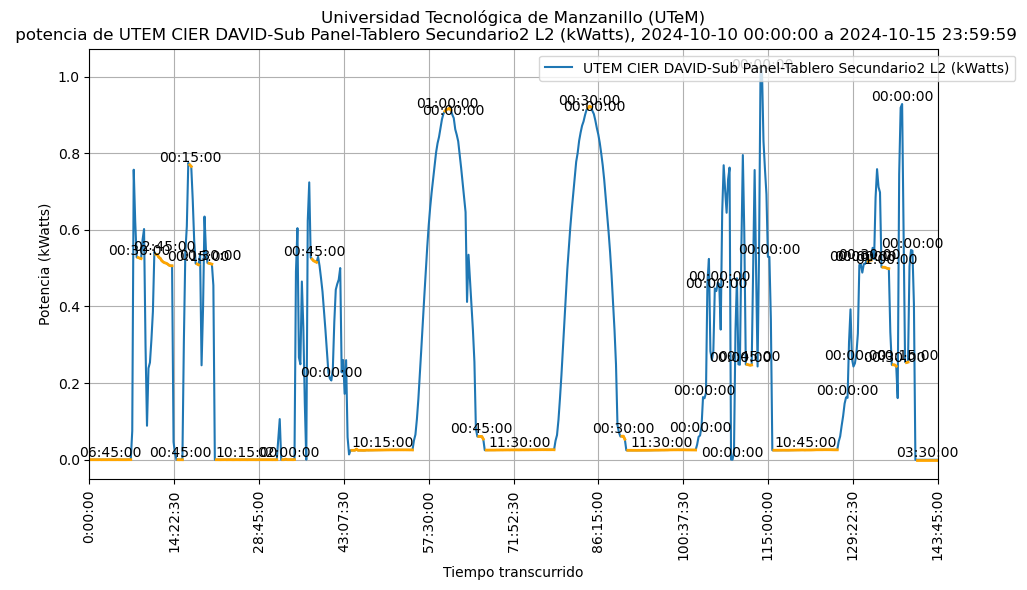

C:\Users\cesar chavez\AppData\Local\Temp\ipykernel_14732\1066235988.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


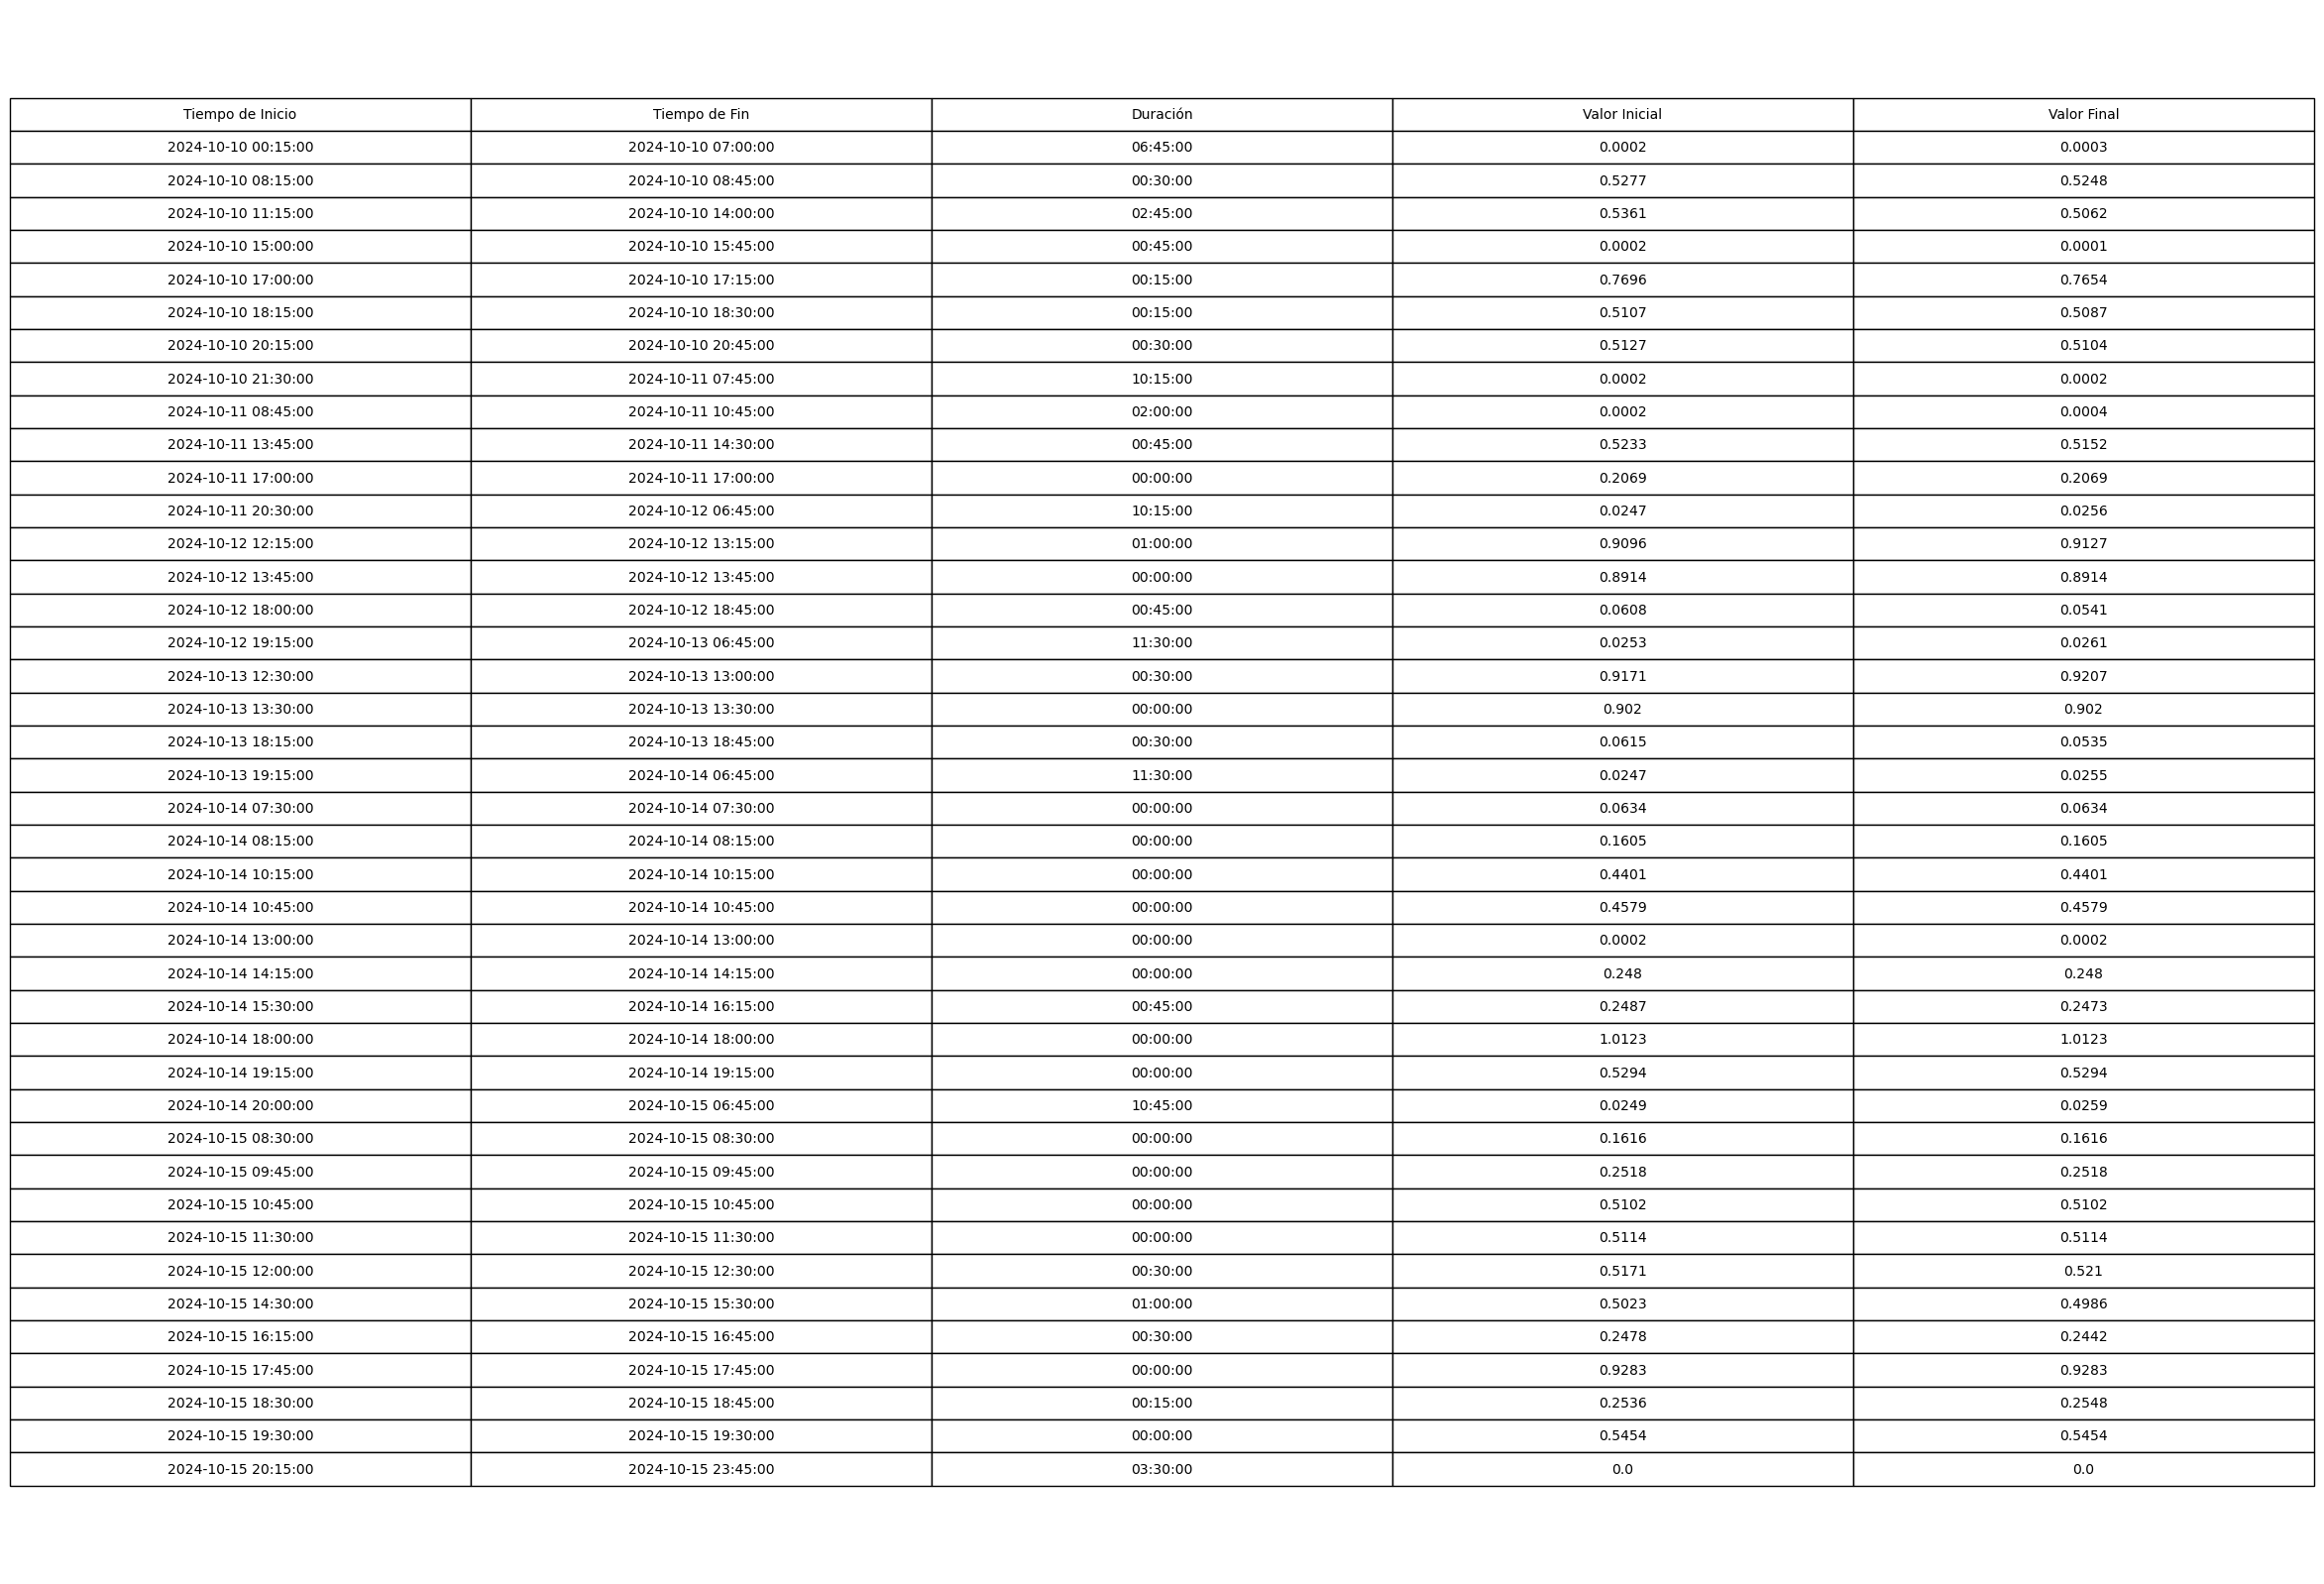

In [239]:
# Calcular el tiempo transcurrido en segundos desde la fecha de inicio
df_filtrado['Tiempo Transcurrido (s)'] = (df_filtrado['Time Bucket (America/Costa_Rica)'] - fecha_inicio).dt.total_seconds()

# Graficar las columnas seleccionadas
plt.figure(figsize=(10, 6))
variaciones_totales = []  # Lista para almacenar las variaciones totales para cada columna

# Lista para almacenar detalles de las variaciones (tiempo inicial, tiempo final, valor inicial, valor final)
detalles_variaciones = []

for columna in columnas_seleccionadas:
    plt.plot(df_filtrado['Tiempo Transcurrido (s)'], df_filtrado[columna], label=columna)

    # Detectar cambios mayores a 0.05
    cambios = (df_filtrado[columna].diff().abs() > 0.01)

    # Identificar segmentos
    segments = []
    current_segment_start = None
    for i in range(1, len(df_filtrado)):
        if cambios.iloc[i]:  # Cambios verdaderos
            if current_segment_start is not None:
                segments.append((current_segment_start, i - 1))
                current_segment_start = None
        else:
            if current_segment_start is None:
                current_segment_start = i

    # Captura el último segmento si está abierto
    if current_segment_start is not None:
        segments.append((current_segment_start, len(df_filtrado) - 1))

    # Marcar los segmentos en la gráfica y guardar detalles
    for start, end in segments:
        plt.plot(df_filtrado['Tiempo Transcurrido (s)'].iloc[start:end + 1],
                 df_filtrado[columna].iloc[start:end + 1],
                 color='orange', linewidth=2)  # Resaltar segmentos

        # Calcular la duración del segmento
        duracion = df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[end] - df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[start]
        
        # Extraer horas, minutos y segundos
        horas, resto = divmod(duracion.total_seconds(), 3600)
        minutos, segundos = divmod(resto, 60)

        # Formato de duración como "HH:MM:SS"
        duracion_formateada = f"{int(horas):02}:{int(minutos):02}:{int(segundos):02}"

        # Añadir texto con la duración en el segmento
        plt.text(df_filtrado['Tiempo Transcurrido (s)'].iloc[start] + (duracion.total_seconds() / 2),
                 df_filtrado[columna].iloc[start],
                 f'{duracion_formateada}', 
                 color='black', 
                 fontsize=10, 
                 ha='center', 
                 va='bottom')

        # Guardar detalles de la variación
        tiempo_inicio = df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[start]
        tiempo_fin = df_filtrado['Time Bucket (America/Costa_Rica)'].iloc[end]
        valor_inicio = df_filtrado[columna].iloc[start]
        valor_final = df_filtrado[columna].iloc[end]
        detalles_variaciones.append([tiempo_inicio, tiempo_fin, valor_inicio, valor_final])

    # Guardar la cantidad de variaciones detectadas
    variaciones_totales.append((columna, len(segments)))

# Configuración del eje X para mostrar solo el tiempo transcurrido en formato HH:MM:SS
plt.xlim(0, df_filtrado['Tiempo Transcurrido (s)'].max())

# Mostrar solo 10 momentos de tiempo en el eje X
num_ticks = 10
ticks = range(0, int(df_filtrado['Tiempo Transcurrido (s)'].max()) + 1, int(df_filtrado['Tiempo Transcurrido (s)'].max() / num_ticks))
plt.xticks(ticks=ticks,
           labels=[f"{int(i // 3600)}:{int((i % 3600) // 60):02}:{int(i % 60):02}" for i in ticks])
plt.xlabel('Tiempo transcurrido')

# Añadir título y etiquetas
nombre_columna = ', '.join(columnas_seleccionadas)  # Unir nombres en caso de múltiples selecciones
plt.title(f"Universidad Tecnológica de Manzanillo (UTeM)\n potencia de {nombre_columna}, {fecha_inicio} a {fecha_fin}")
plt.ylabel('Potencia (kWatts)')

# Mover la leyenda a la parte superior derecha fuera de la gráfica para que no obstruya
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))

# Rotar las etiquetas del eje X para mayor legibilidad
plt.xticks(rotation=90)

# Ajustar el layout para evitar que las etiquetas se corten
plt.tight_layout()

# Añade cuadricula
plt.grid()

# Mostrar la gráfica
plt.show()


# Crear un DataFrame con los detalles de las variaciones detectadas
df_variaciones = pd.DataFrame(detalles_variaciones, columns=['Tiempo de Inicio', 'Tiempo de Fin', 'Valor Inicial', 'Valor Final'])

# Calcular la duración de cada variación en formato HH:MM:SS
df_variaciones['Duración'] = df_variaciones.apply(lambda row: row['Tiempo de Fin'] - row['Tiempo de Inicio'], axis=1)
df_variaciones['Duración'] = df_variaciones['Duración'].apply(lambda x: f"{x.components.hours:02}:{x.components.minutes:02}:{x.components.seconds:02}")

# Reordenar las columnas para tener Duración después de los tiempos
df_variaciones = df_variaciones[['Tiempo de Inicio', 'Tiempo de Fin', 'Duración', 'Valor Inicial', 'Valor Final']]

# Guardar la tabla como archivo CSV para que se pueda visualizar en Excel
df_variaciones.to_csv('variaciones_detectadas.csv', index=False)

# Opcional: Mostrar la tabla en formato gráfico (como una tabla de Excel)
fig, ax = plt.subplots(figsize=(12, len(df_variaciones) * 0.5))  # Ajustar el tamaño para que se vea bien
ax.axis('tight')
ax.axis('off')

# Ajustar el tamaño de la tabla y el layout
table = ax.table(cellText=df_variaciones.values, colLabels=df_variaciones.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(2.5, 2)

plt.tight_layout()
plt.show()
